# Week 4: Model Evaluation & Hyperparameter Tuning
Complete Solution for Cross-Validation, Confusion Matrix, and GridSearchCV using Logistic Regression on Breast Cancer Dataset.

In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

## ✅ Task 1: K-Fold Cross Validation

In [9]:
print("------ TASK 1: K-FOLD CROSS VALIDATION ------")
model = LogisticRegression(max_iter=10000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Mean accuracy across folds:", np.mean(scores))

------ TASK 1: K-FOLD CROSS VALIDATION ------
Accuracy scores for each fold: [0.95614035 0.96491228 0.93859649 0.97368421 0.92035398]
Mean accuracy across folds: 0.9507374631268437


## ✅ Task 2: Confusion Matrix & Classification Report

------ TASK 2: CONFUSION MATRIX & REPORT ------


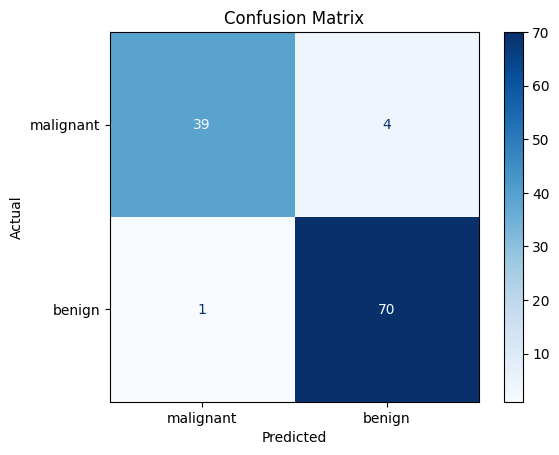

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [10]:
print("------ TASK 2: CONFUSION MATRIX & REPORT ------")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

## ✅ Task 3: Hyperparameter Tuning (GridSearchCV)

In [11]:
print("------ TASK 3: HYPERPARAMETER TUNING ------")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validated Accuracy Score:", grid.best_score_)

# Evaluate best model on test set
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

------ TASK 3: HYPERPARAMETER TUNING ------


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Best Hyperparameters: {'C': 100, 'solver': 'lbfgs'}
Best Cross-Validated Accuracy Score: 0.9670329670329672
Test Accuracy with Best Model: 0.956140350877193
